In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset (replace path if needed)
file_path = "twitter_training.csv"
df = pd.read_csv(file_path, header=None)

In [4]:
# Rename columns for clarity
df.columns = ["Tweet_ID", "Brand", "Sentiment", "Text"]

In [5]:
# Drop duplicates and missing values
df_clean = df.drop_duplicates(subset=["Text"]).dropna()

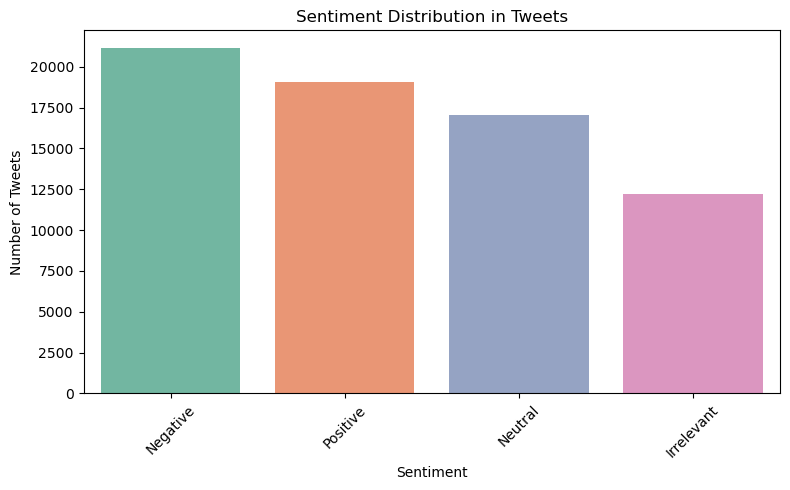

In [6]:
# Plot sentiment distribution
plt.figure(figsize=(8, 5))
sentiment_counts = df_clean["Sentiment"].value_counts()
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="Set2")
plt.title("Sentiment Distribution in Tweets")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

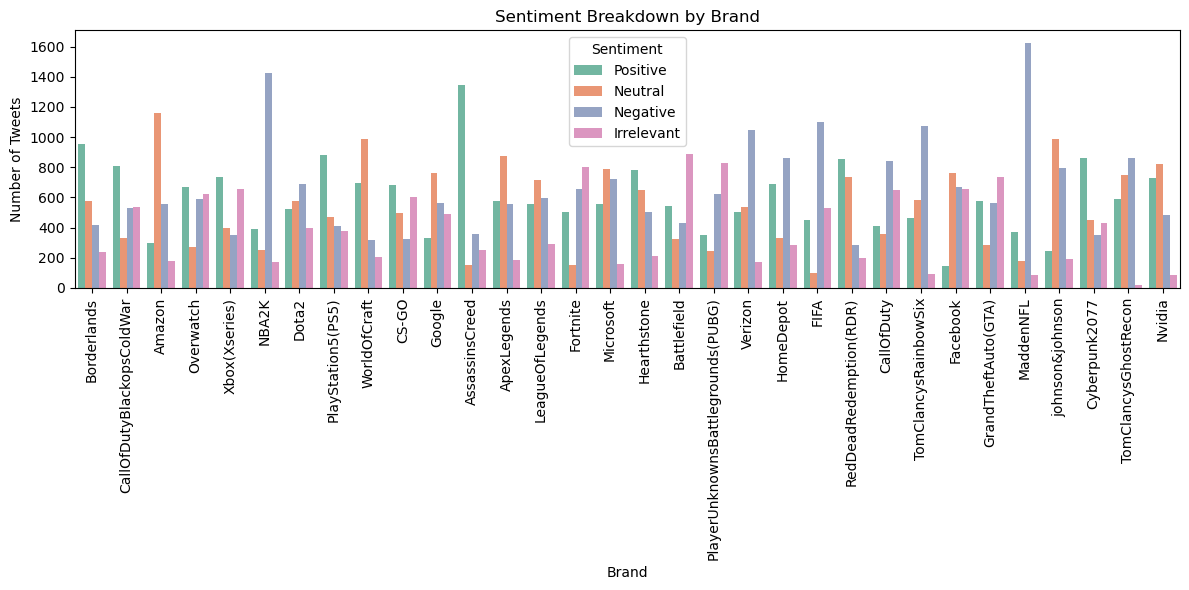

In [7]:
## Optional Enhancements
##vSentiment by Brand:

plt.figure(figsize=(12, 6))
sns.countplot(data=df_clean, x="Brand", hue="Sentiment", palette="Set2")
plt.title("Sentiment Breakdown by Brand")
plt.xlabel("Brand")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [10]:
!pip install wordcloud

   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   --------------------------------------  297.0/299.9 kB 19.1 MB/s eta 0:00:01
   ---------------------------------------- 299.9/299.9 kB 6.2 MB/s eta 0:00:00


In [11]:
#Word Clouds by Sentiment:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [16]:
# Function to create word clouds by sentiment
def plot_wordcloud(sentiment):
    text = " ".join(df_clean[df_clean["Sentiment"] == sentiment]["Text"])
    wc = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud - {sentiment} Tweets", fontsize=16)
    plt.show()

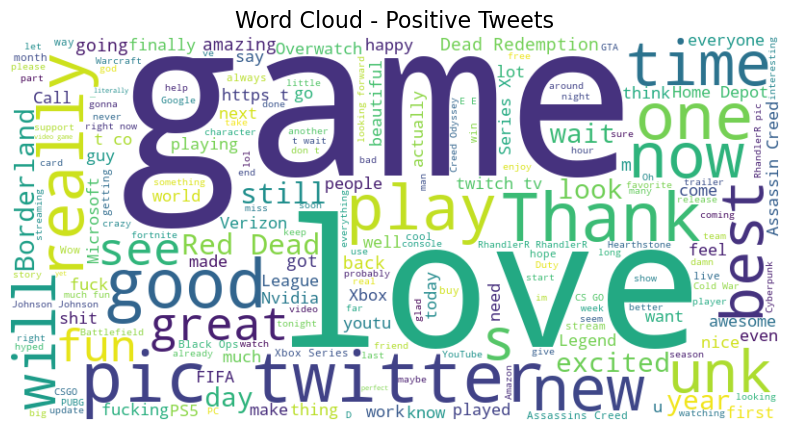

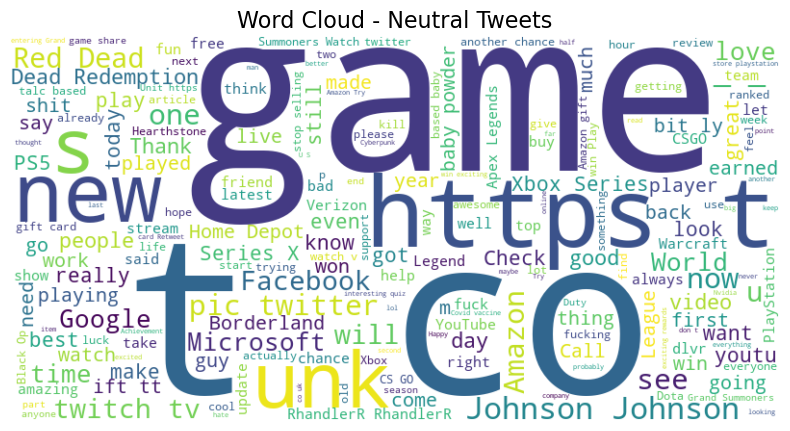

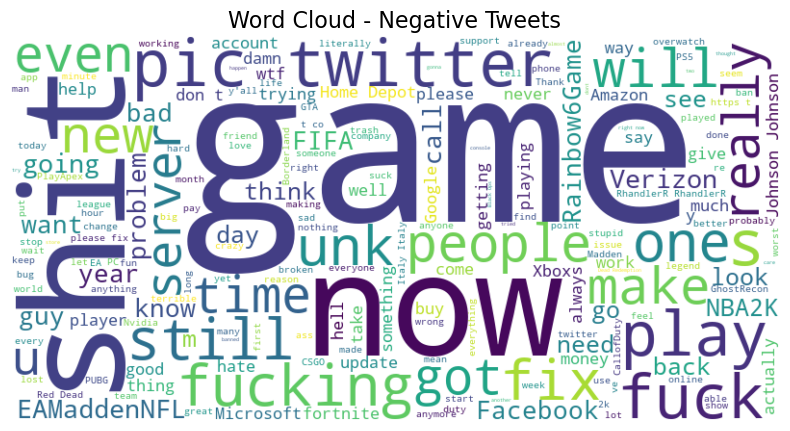

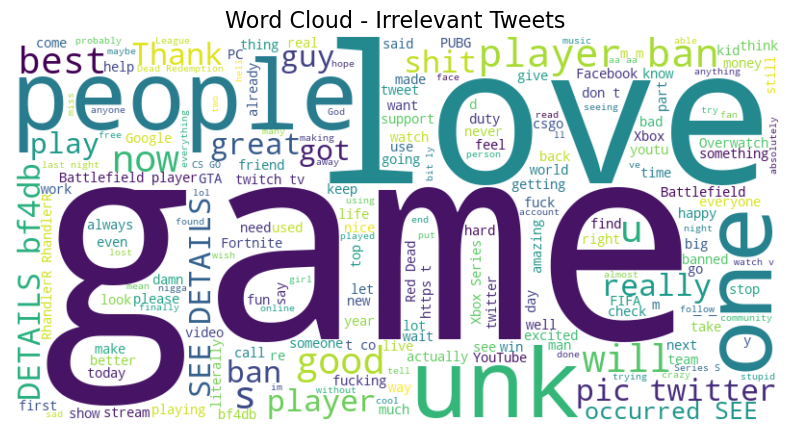

In [15]:
# Generate for each sentiment type
for sentiment in df_clean["Sentiment"].unique():
    plot_wordcloud(sentiment)